# Import packages and loading data

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_Id=train['Id']
train.head()

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2000,199,within an hour,1.00,1.00,t,5,f,-33.918732,151.242035,...,10.0,9.0,10.0,10.0,10.0,t,flexible,f,f,0.23
1,2001,95,NaN,NaN,0.83,t,1,f,-33.698425,151.290979,...,10.0,10.0,10.0,10.0,10.0,t,moderate,f,f,0.83
2,2002,156,within an hour,0.91,0.98,f,8,f,-33.847388,151.072890,...,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,6.90
3,2003,100,within an hour,0.99,0.97,f,260,f,-33.870261,151.195131,...,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1.32
4,2004,100,within a day,1.00,NaN,f,1,f,-33.908168,151.211849,...,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,0.07


# 1. Data Processing
## 1.1 Check missing value

In [5]:
print('training data dimensions: ',np.shape(train))
print('test data dimensions: ',np.shape(test))

training data dimensions:  (2000, 36)
test data dimensions:  (2000, 35)


In [6]:
train.isna().sum().sort_values(ascending=False)

host_response_time                  935
host_response_rate                  935
host_acceptance_rate                713
security_deposit                    707
cleaning_fee                        523
review_scores_accuracy              494
review_scores_value                 493
review_scores_location              493
review_scores_checkin               493
review_scores_communication         491
review_scores_cleanliness           491
review_scores_rating                491
reviews_per_month                   430
beds                                 12
bedrooms                              2
maximum_nights                        0
longitude                             0
price                                 0
require_guest_profile_picture         0
cancellation_policy                   0
instant_bookable                      0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0


In [7]:
test.isna().sum().sort_values(ascending=False)

host_response_time                  976
host_response_rate                  976
host_acceptance_rate                718
security_deposit                    670
cleaning_fee                        501
review_scores_value                 487
review_scores_location              486
review_scores_accuracy              486
review_scores_communication         485
review_scores_checkin               485
review_scores_cleanliness           485
review_scores_rating                484
reviews_per_month                   414
bedrooms                              4
beds                                  3
maximum_nights                        0
property_type                         0
require_guest_profile_picture         0
cancellation_policy                   0
instant_bookable                      0
host_is_superhost                     0
host_listings_count                   0
host_identity_verified                0
latitude                              0
longitude                             0


## 1.2 Deal with missing value

In [8]:
#Prevent the original data from being lost
train_filling = train.copy()
test_filling = test.copy()

In [9]:
train_filling['host_response_time'].value_counts()

within an hour        742
within a few hours    166
within a day          123
a few days or more     34
Name: host_response_time, dtype: int64

In [8]:
train.describe()

,Id,price,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2000.000000,2000.00000,1065.000000,1287.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,1998.000000,...,2000.000000,2000.000000,1509.000000,1506.000000,1509.000000,1507.000000,1509.000000,1507.000000,1507.000000,1570.000000
mean,2999.500000,158.69950,0.948178,0.828026,6.822000,-33.867688,151.213514,3.15300,1.273500,1.467467,...,674.477000,19.114500,92.993373,9.518592,9.185553,9.680823,9.709742,9.720637,9.295952,1.107070
std,577.494589,105.11792,0.166377,0.279295,22.353437,0.065837,0.058547,1.86476,0.629004,0.883665,...,529.072664,42.222752,10.387133,1.015488,1.274637,0.845061,0.840324,0.730382,1.033954,1.502572
min,2000.000000,27.00000,0.000000,0.000000,0.000000,-34.079738,151.040105,1.00000,0.000000,0.000000,...,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000
25%,2499.750000,81.00000,1.000000,0.780000,1.000000,-33.898596,151.185639,2.00000,1.000000,1.000000,...,30.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000,0.110000
50%,2999.500000,129.00000,1.000000,0.970000,1.000000,-33.883093,151.215642,2.00000,1.000000,1.000000,...,1125.000000,3.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.440000
75%,3499.250000,200.00000,1.000000,1.000000,2.000000,-33.847333,151.259393,4.00000,1.500000,2.000000,...,1125.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.550000
max,3999.000000,550.00000,1.000000,1.000000,260.000000,-33.589555,151.339922,16.00000,18.000000,6.000000,...,1125.000000,598.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.860000


In [9]:
#deal with missing value by filling NA
train_filling['host_response_time'].fillna('no response',inplace = True)
train_filling['host_response_rate'].fillna(0,inplace = True)

#deal with missing value by filling the average column value
train_filling['host_acceptance_rate'].fillna(train_filling['host_acceptance_rate'].mean(),inplace=True)
train_filling['security_deposit'].fillna(train_filling['security_deposit'].mean(),inplace=True)
train_filling['cleaning_fee'].fillna(train_filling['cleaning_fee'].mean(),inplace=True)
train_filling['reviews_per_month'].fillna(train_filling['reviews_per_month'].mean(),inplace=True)

review_scores=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
               'review_scores_checkin','review_scores_communication','review_scores_location',
               'review_scores_value']
train_filling[review_scores]=train_filling[review_scores].fillna(train_filling[review_scores].mean())

#deal with missing value according to corresponding variable data
train_filling.loc[train_filling['bedrooms'].isnull(),'bedrooms']=train_filling.loc[train_filling['bedrooms'].isnull(),'bathrooms']
train_filling.loc[train_filling['beds'].isnull(),'beds']=train_filling.loc[train_filling['beds'].isnull(),'bathrooms']

In [10]:
#deal with missing value by filling NA
test_filling['host_response_time'].fillna('no response',inplace = True)
test_filling['host_response_rate'].fillna(0,inplace = True)

#deal with missing value by filling the average column value
test_filling['host_acceptance_rate'].fillna(test_filling['host_acceptance_rate'].mean(),inplace=True)
test_filling['security_deposit'].fillna(test_filling['security_deposit'].mean(),inplace=True)
test_filling['cleaning_fee'].fillna(test_filling['cleaning_fee'].mean(),inplace=True)
test_filling['reviews_per_month'].fillna(test_filling['reviews_per_month'].mean(),inplace=True)

review_scores=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
               'review_scores_checkin','review_scores_communication','review_scores_location',
               'review_scores_value']
test_filling[review_scores]=test_filling[review_scores].fillna(test_filling[review_scores].mean())

#deal with missing value according to corresponding variable data
test_filling.loc[test_filling['bedrooms'].isnull(),'bedrooms']=test_filling.loc[test_filling['bedrooms'].isnull(),'bathrooms']
test_filling.loc[test_filling['beds'].isnull(),'beds']=test_filling.loc[test_filling['beds'].isnull(),'bathrooms']

In [11]:
train_filling.isna().sum()

Id                                  0
price                               0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_score

In [12]:
test_filling.isna().sum()

Id                                  0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
host_identity_verified              0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating                0
review_scores_accuracy              0
review_scores_cleanliness           0
review_score

# 2. Feature Engineering

In [13]:
train_clean = train_filling.copy() 
test_clean = test_filling.copy()

In [14]:
train_clean.dtypes.sort_values()

Id                                    int64
price                                 int64
extra_people                          int64
minimum_nights                        int64
accommodates                          int64
maximum_nights                        int64
host_listings_count                   int64
number_of_reviews                     int64
guests_included                       int64
review_scores_accuracy              float64
review_scores_cleanliness           float64
review_scores_checkin               float64
review_scores_communication         float64
review_scores_location              float64
review_scores_value                 float64
review_scores_rating                float64
cleaning_fee                        float64
security_deposit                    float64
reviews_per_month                   float64
beds                                float64
bedrooms                            float64
bathrooms                           float64
longitude                       

In [15]:
#Divide all data into numerical data and categorical data
categorical_variables = train_clean.columns[train_clean.dtypes=='object']
nemerical_variables = train_clean.columns[train_clean.dtypes!='object']

In [16]:
#check how many types in each categorical feature
train_clean[categorical_variables].nunique()

host_response_time                   5
host_is_superhost                    2
host_identity_verified               2
property_type                       23
room_type                            4
bed_type                             4
instant_bookable                     2
cancellation_policy                  5
require_guest_profile_picture        2
require_guest_phone_verification     2
dtype: int64

In [17]:
train_clean['property_type'].value_counts()

Apartment             1327
House                  423
Townhouse               78
Guest suite             34
Condominium             34
Guesthouse              28
Villa                   12
Boutique hotel          10
Serviced apartment       9
Loft                     9
Cottage                  7
Cabin                    6
Bungalow                 6
Hostel                   3
Tiny house               2
Boat                     2
Bed and breakfast        2
Hotel                    2
Other                    2
Treehouse                1
Camper/RV                1
Tent                     1
Farm stay                1
Name: property_type, dtype: int64

In [18]:
# encoding smaller number of types for property type
train_clean['property_type']=np.where(train_clean['property_type'].str.contains('Apartment'),'Apartment',
                               (np.where(train_clean['property_type'].str.contains('House'),'House',
                                       (np.where(train_clean['property_type'].str.contains('Townhouse'),'Townhouse',
                                                'Other')))))

test_clean['property_type']=np.where(test_clean['property_type'].str.contains('Apartment'),'Apartment',
                               (np.where(test_clean['property_type'].str.contains('House'),'House',
                                       (np.where(test_clean['property_type'].str.contains('Townhouse'),'Townhouse',
                                                'Other')))))

In [19]:
pd.crosstab(index=train_clean['property_type'],columns='count')

col_0,count
property_type,
Apartment,1327
House,423
Other,172
Townhouse,78


In [20]:
#convert true/false data to 1/0
train_clean['host_is_superhost']=train_clean.host_is_superhost.map({'f':0, 't':1})

for i in ['host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']:
    train_clean[i]=train_clean[i].map({'f':0, 't':1})
    
#Convert ordinal data to numbers
train_clean['host_response_time']=train_clean.host_response_time.map({'no response': 0, 'a few days or more': 1, 
                                                         'within a day': 2, 'within a few hours':3,
                                                         'within an hour':4})

train_clean['cancellation_policy']=train_clean.cancellation_policy.map({'super_strict_60': 0, 'super_strict_30': 1,
                                                           'strict_14_with_grace_period': 2, 'moderate': 3,
                                                            'flexible': 4})


In [21]:
#convert true/false data to 1/0
test_clean['host_is_superhost']=test_clean.host_is_superhost.map({'f':0, 't':1})

for i in ['host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']:
    test_clean[i]=test_clean[i].map({'f':0, 't':1})
    
#Convert ordinal data to numbers
test_clean['host_response_time']=test_clean.host_response_time.map({'no response': 0, 'a few days or more': 1, 
                                                         'within a day': 2, 'within a few hours':3,
                                                         'within an hour':4})

test_clean['cancellation_policy']=test_clean.cancellation_policy.map({'super_strict_60': 0, 'super_strict_30': 1,
                                                           'strict_14_with_grace_period': 2, 'moderate': 3,
                                                            'flexible': 4})

In [22]:
test_clean['host_response_time'].isnull().sum()

0

In [23]:
#convert the remining categorical variable to dummy variable
train_clean.dtypes.sort_values()

Id                                    int64
extra_people                          int64
guests_included                       int64
number_of_reviews                     int64
require_guest_phone_verification      int64
accommodates                          int64
minimum_nights                        int64
instant_bookable                      int64
maximum_nights                        int64
host_listings_count                   int64
host_is_superhost                     int64
cancellation_policy                   int64
require_guest_profile_picture         int64
host_response_time                    int64
price                                 int64
host_identity_verified                int64
review_scores_value                 float64
review_scores_location              float64
review_scores_checkin               float64
review_scores_cleanliness           float64
review_scores_accuracy              float64
review_scores_rating                float64
review_scores_communication     

In [24]:
# create dummy variables to make graphing more convenient
train_dummy=train_clean.copy()
test_dummy=test_clean.copy()

In [25]:
np.shape(train_dummy)

(2000, 36)

In [26]:
train_dummy=pd.get_dummies(train_dummy, drop_first=True)
test_dummy=pd.get_dummies(test_dummy, drop_first=True)
train_dummy.head()

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,reviews_per_month,property_type_House,property_type_Other,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,2000,199,4,1.00,1.000000,1,5,0,-33.918732,151.242035,...,0.23,0,1,0,1,0,0,0,0,1
1,2001,95,0,0.00,0.830000,1,1,0,-33.698425,151.290979,...,0.83,0,1,0,0,0,0,0,0,1
2,2002,156,4,0.91,0.980000,0,8,0,-33.847388,151.072890,...,6.90,0,0,0,0,0,0,0,0,1
3,2003,100,4,0.99,0.970000,0,260,0,-33.870261,151.195131,...,1.32,0,0,0,0,0,0,0,0,1
4,2004,100,2,1.00,0.828026,0,1,0,-33.908168,151.211849,...,0.07,0,0,0,0,1,0,0,0,1


In [27]:
# create new feature: distance to town hall(Latitude: -33.8732 Longitude: 151.2063)
# Euclidean distance for distance measurement
train_dummy['lat_dist_to_bondi']=train_dummy['latitude']-(-33.890697)
train_dummy['lon_dist_to_bondi']=train_dummy['longitude']-151.272411

train_dummy['dist_to_bondi']=np.sqrt(np.power(train_dummy['lat_dist_to_bondi'],2)+np.power(train_dummy['lon_dist_to_bondi'],2))
train_dummy['dist_to_bondi']

0       0.041336
1       0.193166
2       0.204168
3       0.079936
4       0.063031
          ...   
1995    0.056334
1996    0.083837
1997    0.072530
1998    0.104884
1999    0.160454
Name: dist_to_bondi, Length: 2000, dtype: float64

In [28]:
test_dummy['lat_dist_to_bondi']=test_dummy['latitude']-(-33.890697)
test_dummy['lon_dist_to_bondi']=test_dummy['longitude']-151.272411

test_dummy['dist_to_bondi']=np.sqrt(np.power(test_dummy['lat_dist_to_bondi'],2)+np.power(test_dummy['lon_dist_to_bondi'],2))

In [29]:
print('training data dimensions: ',np.shape(train_dummy))
print('test data dimensions: ',np.shape(test_dummy))

training data dimensions:  (2000, 45)
test data dimensions:  (2000, 44)


# 3. Exploratory Data Analysis

In [30]:
train_eda=train_dummy.copy()
test_eda=test_dummy.copy()

In [31]:
#divide data into dummy variables and non_dummy variables
dummy = []
non_dummy = []
for i in train_eda.columns[1:]:
    if train_eda[i].value_counts().shape[0]>2:
        non_dummy.append(i)
    else:
        dummy.append(i)

print('dummy_variable: {}'.format(dummy))
print('')
print('non_dummy_varibale:{}'.format(non_dummy))

dummy_variable: ['host_is_superhost', 'host_identity_verified', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'property_type_House', 'property_type_Other', 'property_type_Townhouse', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room', 'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed']

non_dummy_varibale:['price', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'reviews_per_month', 'lat_dist_to_bondi', 'lon_dist_to_bondi', 'dist_to_bondi']


In [32]:
#Determine whether the data is normally distributed
descriptive=train_eda.describe()
descriptive.loc['skew',:]=train_eda.skew()
descriptive.loc['kurt',:]=train_eda.kurt()
descriptive.T

,count,mean,std,min,25%,50%,75%,max,skew,kurt
Id,2000.0,2999.500000,577.494589,2000.000000,2499.750000,2999.500000,3499.250000,3999.000000,0.000000,-1.200000
price,2000.0,158.699500,105.117920,27.000000,81.000000,129.000000,200.000000,550.000000,1.432543,1.911276
host_response_time,2000.0,1.873000,1.854613,0.000000,0.000000,2.000000,4.000000,4.000000,0.095121,-1.860192
host_response_rate,2000.0,0.504905,0.488525,0.000000,0.000000,0.750000,1.000000,1.000000,-0.038837,-1.969366
host_acceptance_rate,2000.0,0.828026,0.224015,0.000000,0.828026,0.828026,0.990000,1.000000,-2.357021,5.696380
host_is_superhost,2000.0,0.146500,0.353695,0.000000,0.000000,0.000000,0.000000,1.000000,2.000897,2.005594
host_listings_count,2000.0,6.822000,22.353437,0.000000,1.000000,1.000000,2.000000,260.000000,6.608375,53.161005
host_identity_verified,2000.0,0.373500,0.483854,0.000000,0.000000,0.000000,1.000000,1.000000,0.523408,-1.727773
latitude,2000.0,-33.867688,0.065837,-34.079738,-33.898596,-33.883093,-33.847333,-33.589555,1.210379,3.157069
longitude,2000.0,151.213514,0.058547,151.040105,151.185639,151.215642,151.259393,151.339922,-0.722984,0.218890


###  Exploratory on price

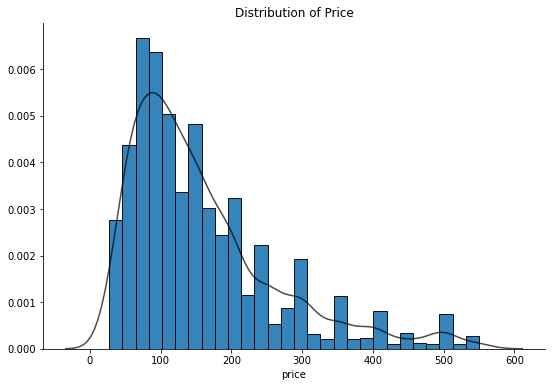

In [33]:
from statlearning import plot_dist
plot_dist(train_eda['price'])
plt.title('Distribution of Price')
plt.show()

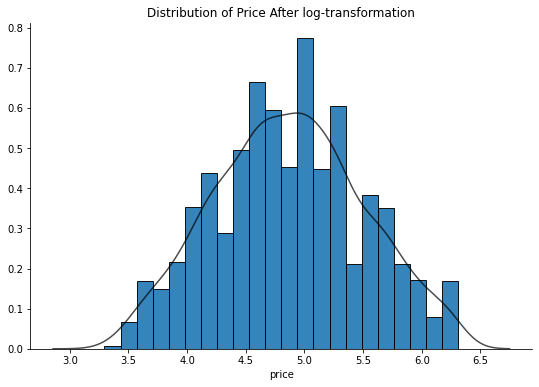

In [34]:
#log-transformation on y
log_y_train=np.log(train_eda['price'])
plot_dist(log_y_train)
plt.title('Distribution of Price After log-transformation')
plt.show()

### Exploratory on non-dummy features

In [35]:
non_dummy

['price',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cancellation_policy',
 'reviews_per_month',
 'lat_dist_to_bondi',
 'lon_dist_to_bondi',
 'dist_to_bondi']

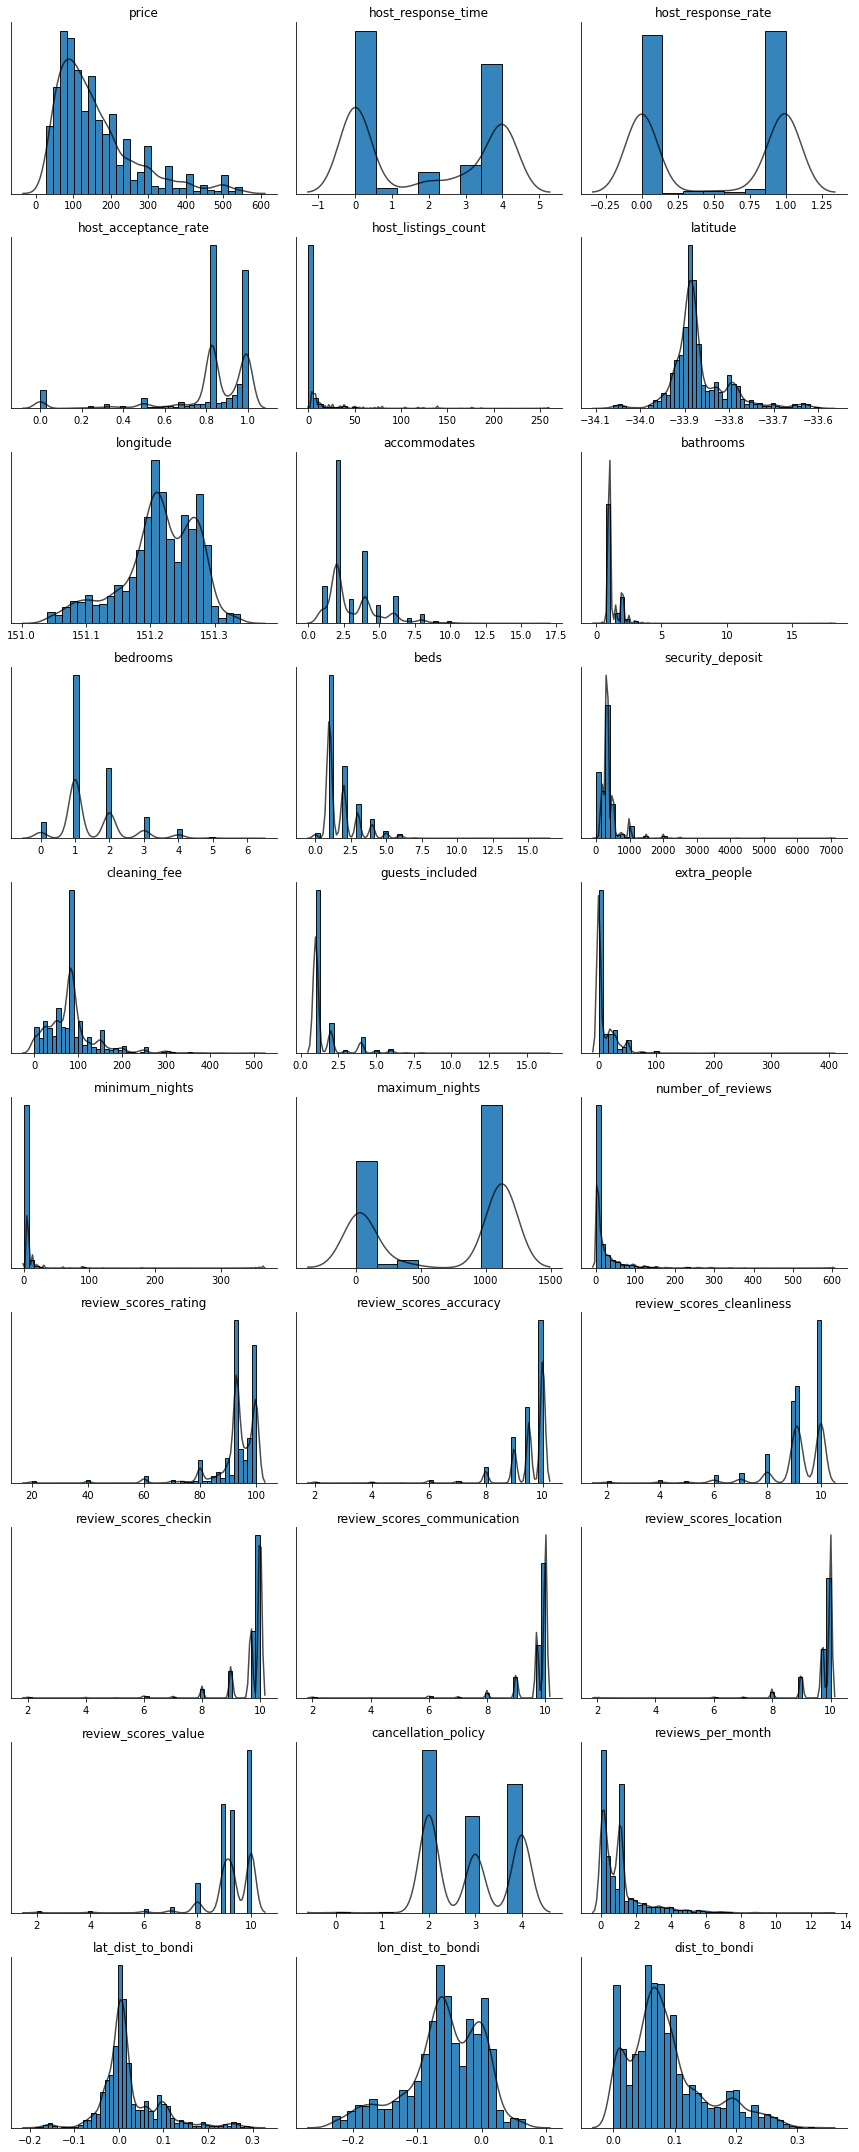

In [36]:
#Exploration of all the numerical variable
from statlearning import plot_dists
plot_dists(train_eda[non_dummy])
plt.show()

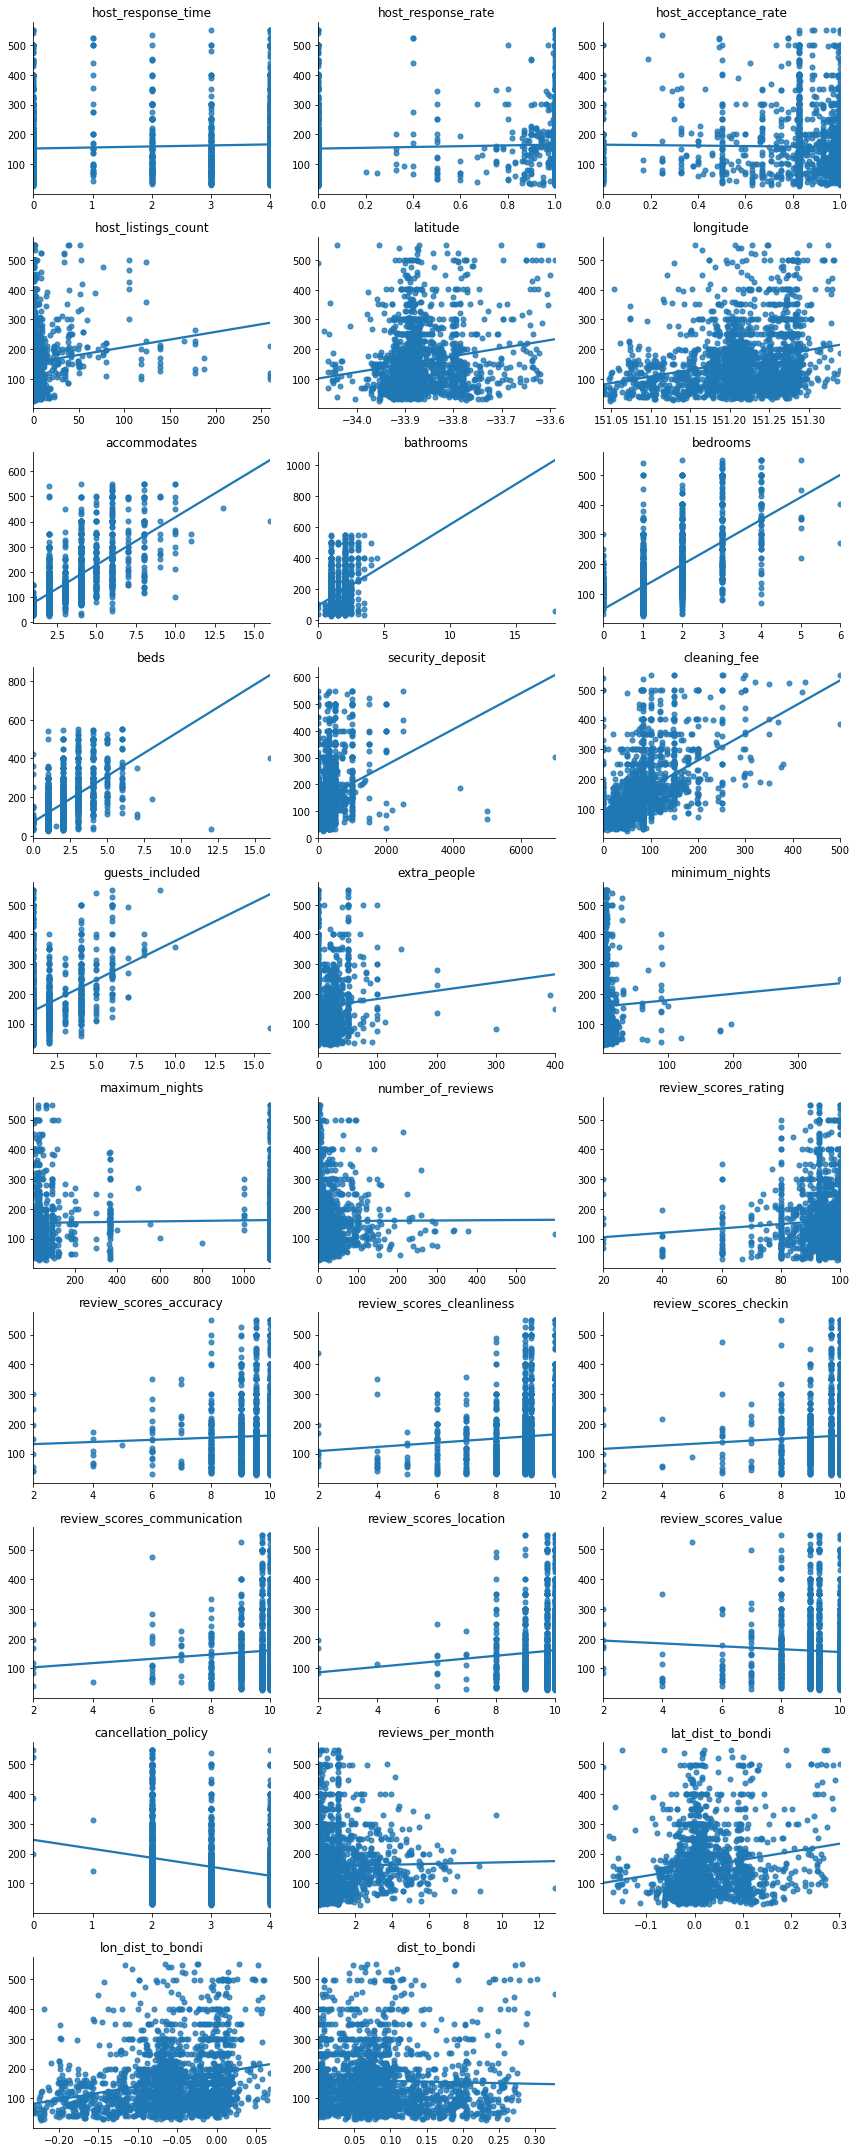

In [37]:
#Exploring the relationship between price and non-dummy variables
from statlearning import plot_regressions
reg_non_dummy=non_dummy.copy()
reg_non_dummy.remove('price')
plot_regressions(train_eda[reg_non_dummy],train_eda['price'])
plt.show()

In [38]:
correlation=train_eda.corr()['price'].sort_values()
correlation

room_type_Private room             -0.555945
cancellation_policy                -0.250622
room_type_Shared room              -0.114419
instant_bookable                   -0.065898
review_scores_value                -0.041161
bed_type_Pull-out Sofa             -0.033659
dist_to_bondi                      -0.028603
require_guest_phone_verification   -0.020422
host_acceptance_rate               -0.016464
Id                                 -0.014077
bed_type_Futon                     -0.014059
require_guest_profile_picture      -0.009049
property_type_Other                -0.001329
room_type_Hotel room               -0.000117
property_type_Townhouse             0.002886
number_of_reviews                   0.003212
reviews_per_month                   0.017446
minimum_nights                      0.028569
review_scores_accuracy              0.030090
host_identity_verified              0.038157
review_scores_checkin               0.039056
maximum_nights                      0.041931
bed_type_R

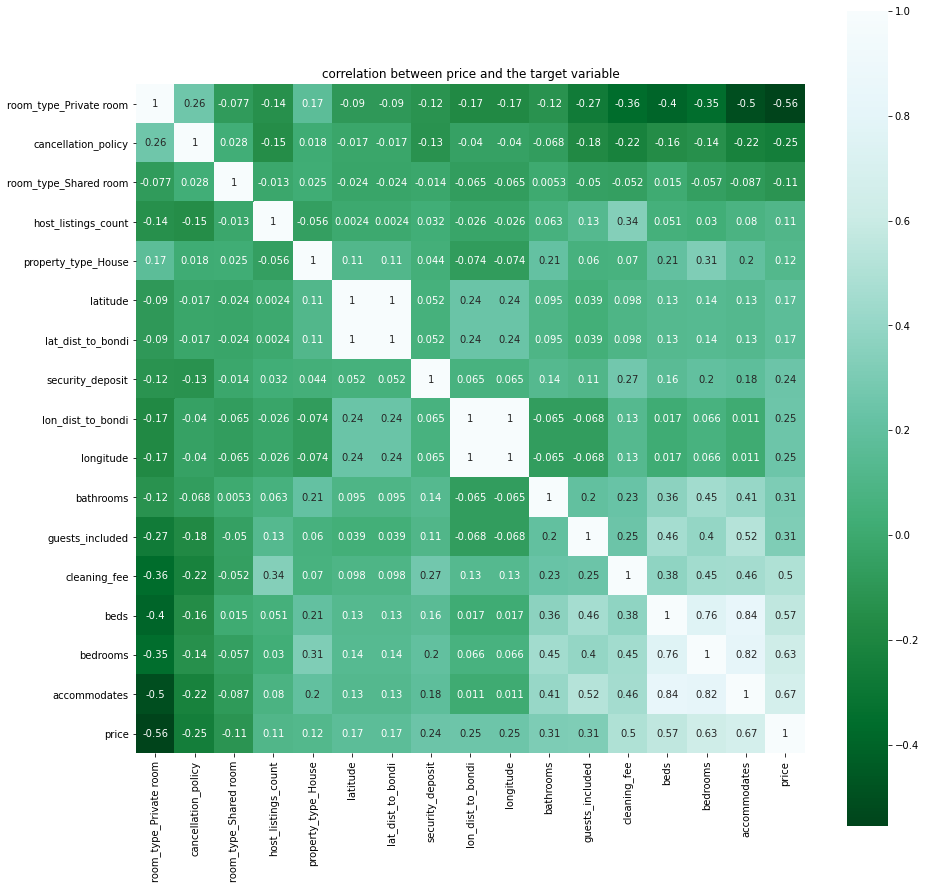

In [39]:
corr=train_eda[correlation.loc[(correlation>0.1)|(correlation< -0.1)].index]
plt.subplots(figsize=(15,15))
sns.heatmap(corr.corr(),square=True, annot=True, cmap='BuGn_r')
plt.title('correlation between price and the target variable')
plt.savefig('corrmat.jpg')

### 	Exploratory on dummy variables

In [40]:
dummy

['host_is_superhost',
 'host_identity_verified',
 'instant_bookable',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'property_type_House',
 'property_type_Other',
 'property_type_Townhouse',
 'room_type_Hotel room',
 'room_type_Private room',
 'room_type_Shared room',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed']

In [41]:
train_clean.groupby(['property_type']).mean()['price'].sort_values().reset_index()

,property_type,price
0,Apartment,150.721176
1,Other,158.244186
2,Townhouse,160.205128
3,House,183.635934


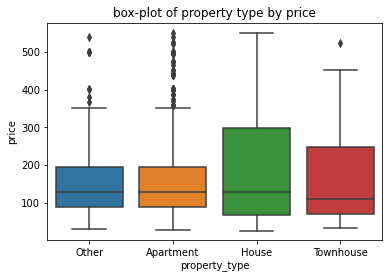

In [42]:
sns.boxplot(x=train_clean['property_type'],y=train_clean['price'])
plt.title('box-plot of property type by price')
plt.savefig('property.jpg')

In [43]:
train_clean.groupby(['room_type']).mean()['price'].sort_values().reset_index()

,room_type,price
0,Shared room,47.217391
1,Private room,77.025111
2,Hotel room,158.562500
3,Entire home/apt,203.761682


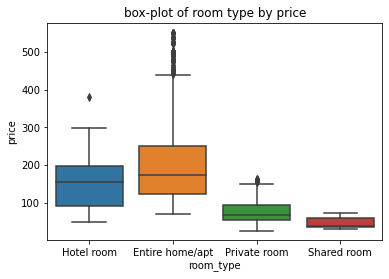

In [44]:
sns.boxplot(x=train_clean['room_type'],y=train_clean['price'])
plt.title('box-plot of room type by price')
plt.savefig('roomtype.jpg')

In [45]:
train_clean.groupby(['bed_type']).mean()['price'].sort_values().reset_index()

,bed_type,price
0,Airbed,64.333333
1,Pull-out Sofa,108.800000
2,Futon,112.000000
3,Real Bed,159.140554


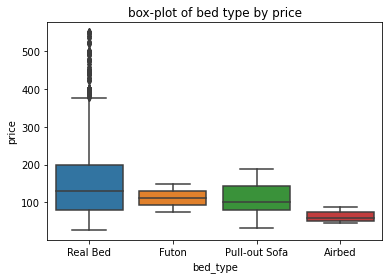

In [46]:
sns.boxplot(x=train_clean['bed_type'],y=train_clean['price'])
plt.title('box-plot of bed type by price')
plt.savefig('roomtype.jpg')

In [47]:
train_clean.groupby(['cancellation_policy']).mean()['price'].sort_values().reset_index()

,cancellation_policy,price
0,4,130.253776
1,3,146.437751
2,2,187.206235
3,1,227.000000
4,0,415.250000


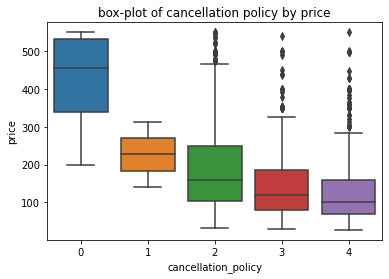

In [48]:
sns.boxplot(x=train_eda['cancellation_policy'],y=train_eda['price'])
plt.title('box-plot of cancellation policy by price')
plt.savefig('cancellation.jpg')

### 	Exploratory on location

<AxesSubplot:xlabel='longitude'>

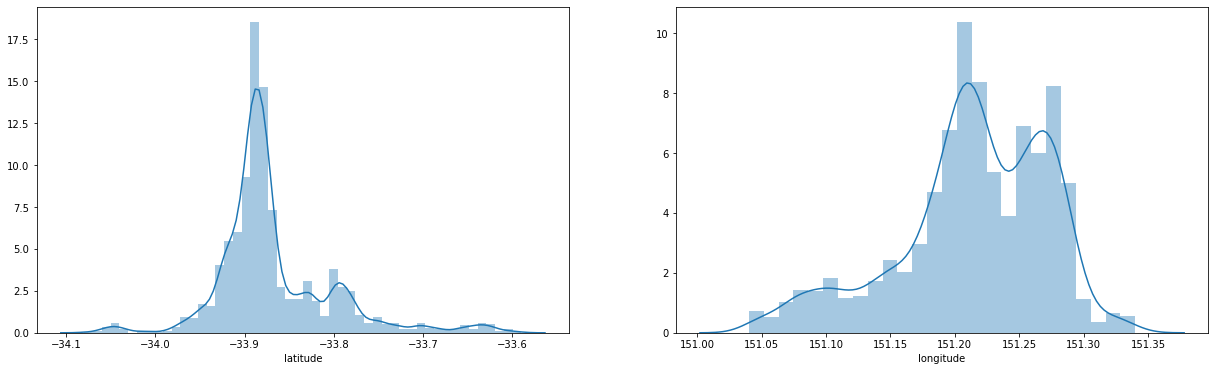

In [49]:
fig, axes = plt.subplots(1,2, figsize=(21,6))
sns.distplot(train_eda['latitude'], ax=axes[0])
sns.distplot(train_eda['longitude'], ax=axes[1])

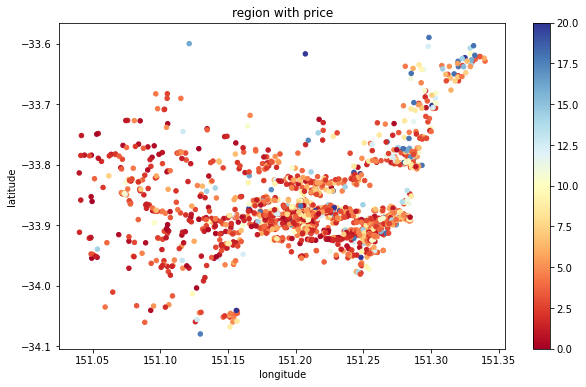

In [50]:
plt.figure(figsize=(10,6))
price=train_eda['price']
c=20*(price-price.min())/(price.max()-price.min())
sp=plt.scatter(x= train_eda['longitude'], y=train_eda['latitude'], c=c, vmin=0, vmax=20, s=20, cmap='RdYlBu')
plt.colorbar(sp)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('region with price')
plt.savefig('location.jpg')

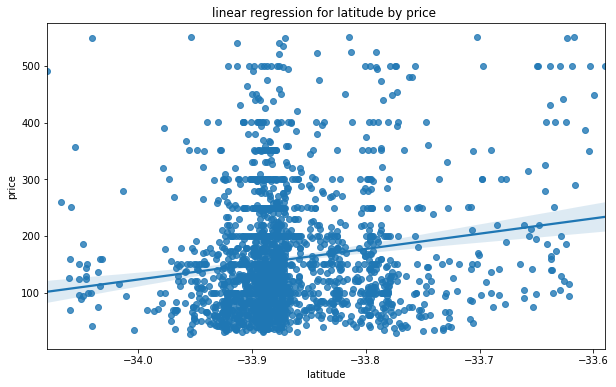

In [51]:
plt.subplots(figsize=(10,6))
sns.regplot(x= train_eda['latitude'], y=train_eda['price'],scatter= True, fit_reg=True)
plt.title('linear regression for latitude by price ')
plt.savefig('latitude.jpg')

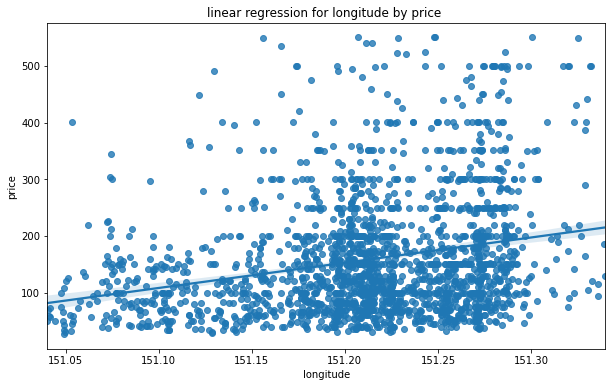

In [52]:
plt.subplots(figsize=(10,6))
sns.regplot(x= train_eda['longitude'], y=train_eda['price'],scatter= True, fit_reg=True)
plt.title('linear regression for longitude by price ')
plt.savefig('longitude reg.jpg')

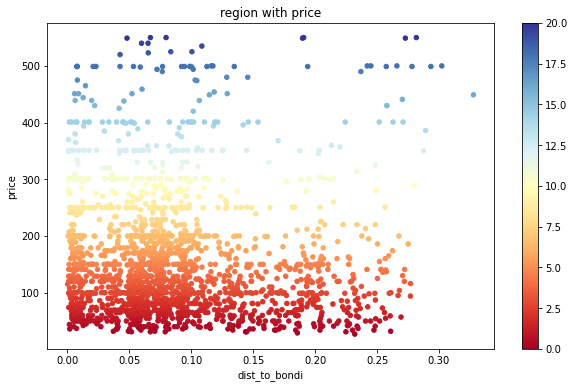

In [53]:
plt.figure(figsize=(10,6))
price=train_clean['price']
c=20*(price-price.min())/(price.max()-price.min())
sp=plt.scatter(x= train_dummy['dist_to_bondi'], y=train_clean['price'], c=c, vmin=0, vmax=20, s=20, cmap='RdYlBu')
plt.colorbar(sp)

plt.xlabel('dist_to_bondi')
plt.ylabel('price')
plt.title('region with price')
plt.savefig('dist_to_bondi.jpg')

# 4. Pre-processing

## 4.1 	Log-transformation 

In [54]:
x_train=train_eda.drop(['price','Id'],axis=1)
y_train=train_eda['price']
x_test=test_eda.drop(['Id'],axis=1)

In [55]:
log_train=train_eda.copy()
log_test=test_eda.copy()

In [56]:
#log transformation on the positive skew data
statistic=log_train.describe()
statistic.loc['skew',:]=log_train.skew()
statistic.loc['kurt',:]=log_train.kurt()
statistic=statistic[non_dummy].T
statistic

,count,mean,std,min,25%,50%,75%,max,skew,kurt
price,2000.0,158.699500,105.117920,27.000000,81.000000,129.000000,200.000000,550.000000,1.432543,1.911276
host_response_time,2000.0,1.873000,1.854613,0.000000,0.000000,2.000000,4.000000,4.000000,0.095121,-1.860192
host_response_rate,2000.0,0.504905,0.488525,0.000000,0.000000,0.750000,1.000000,1.000000,-0.038837,-1.969366
host_acceptance_rate,2000.0,0.828026,0.224015,0.000000,0.828026,0.828026,0.990000,1.000000,-2.357021,5.696380
host_listings_count,2000.0,6.822000,22.353437,0.000000,1.000000,1.000000,2.000000,260.000000,6.608375,53.161005
latitude,2000.0,-33.867688,0.065837,-34.079738,-33.898596,-33.883093,-33.847333,-33.589555,1.210379,3.157069
longitude,2000.0,151.213514,0.058547,151.040105,151.185639,151.215642,151.259393,151.339922,-0.722984,0.218890
accommodates,2000.0,3.153000,1.864760,1.000000,2.000000,2.000000,4.000000,16.000000,1.427120,2.602948
bathrooms,2000.0,1.273500,0.629004,0.000000,1.000000,1.000000,1.500000,18.000000,10.388078,250.792741
bedrooms,2000.0,1.467000,0.883347,0.000000,1.000000,1.000000,2.000000,6.000000,1.270623,2.098714


In [57]:
#make sure all data is positive before log transformation
log_train['latitude'] = -log_train['latitude']
log_train['lat_dist_to_bondi']=np.absolute(log_train['lat_dist_to_bondi'])
log_train['lon_dist_to_bondi']=np.absolute(log_train['lon_dist_to_bondi'])

In [58]:
log_train['lat_dist_to_bondi']

0       0.028035
1       0.192272
2       0.043309
3       0.020436
4       0.017471
          ...   
1995    0.009695
1996    0.021754
1997    0.005086
1998    0.022873
1999    0.160000
Name: lat_dist_to_bondi, Length: 2000, dtype: float64

In [59]:
log_train['latitude'] 

0       33.918732
1       33.698425
2       33.847388
3       33.870261
4       33.908168
          ...    
1995    33.881002
1996    33.868943
1997    33.885611
1998    33.867824
1999    33.730697
Name: latitude, Length: 2000, dtype: float64

In [60]:
log_test['latitude'] = -log_test['latitude']
log_test['lat_dist_to_bondi']=np.absolute(log_test['lat_dist_to_bondi'])
log_test['lon_dist_to_bondi']=np.absolute(log_test['lon_dist_to_bondi'])

In [61]:
positive_skew_features=statistic.loc[statistic['skew']>0].index
positive_skew_features

Index(['price', 'host_response_time', 'host_listings_count', 'latitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'cancellation_policy', 'reviews_per_month',
       'lat_dist_to_bondi', 'dist_to_bondi'],
      dtype='object')

In [62]:
# for each features with positive skewness, we can change them one by one
for i in positive_skew_features[1:]:
    log_train[i]=np.log(log_train[i]+1)
    log_test[i]=np.log(log_train[i]+1)

In [63]:
log_train['price'] = np.log(log_train['price'])

In [64]:
# define x,y again after log transformation
log_x_train = log_train.drop(['price','Id'],axis=1)
log_y_train = log_train['price']
log_x_test = log_test.drop(['Id'],axis=1)

In [65]:
log_train

,Id,price,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,...,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,lat_dist_to_bondi,lon_dist_to_bondi,dist_to_bondi
0,2000,5.293305,1.609438,1.00,1.000000,1,1.791759,0,3.553023,151.242035,...,0,1,0,0,0,0,1,0.027649,0.030376,0.040504
1,2001,4.553877,0.000000,0.00,0.830000,1,0.693147,0,3.546694,151.290979,...,0,0,0,0,0,0,1,0.175860,0.018568,0.176610
2,2002,5.049856,1.609438,0.91,0.980000,0,2.197225,0,3.550978,151.072890,...,0,0,0,0,0,0,1,0.042397,0.199521,0.185788
3,2003,4.605170,1.609438,0.99,0.970000,0,5.564520,0,3.551634,151.195131,...,0,0,0,0,0,0,1,0.020230,0.077280,0.076902
4,2004,4.605170,1.098612,1.00,0.828026,0,0.693147,0,3.552721,151.211849,...,0,0,1,0,0,0,1,0.017320,0.060562,0.061124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3995,3.806662,1.609438,1.00,0.990000,0,3.178054,1,3.551942,151.216918,...,1,0,1,0,0,0,1,0.009648,0.055493,0.054804
1996,3996,4.682131,1.609438,1.00,0.950000,0,2.302585,0,3.551597,151.191446,...,0,1,0,0,0,0,1,0.021521,0.080965,0.080507
1997,3997,4.787492,1.609438,1.00,0.950000,1,1.791759,1,3.552074,151.200060,...,0,0,0,0,0,0,1,0.005073,0.072351,0.070020
1998,3998,4.499810,1.098612,0.80,0.500000,0,1.386294,1,3.551564,151.170051,...,0,0,1,0,0,0,1,0.022616,0.102360,0.099741


In [66]:
#check whther the right-skewed data is improve
statistic_afterlog=log_train.describe()
statistic_afterlog.loc['skew',:]=log_train.skew()
statistic_afterlog.loc['kurt',:]=log_train.kurt()
statistic_afterlog=statistic_afterlog[non_dummy].T
statistic_afterlog

,count,mean,std,min,25%,50%,75%,max,skew,kurt
price,2000.0,4.869223,0.631238,3.295837,4.394449,4.859812,5.298317,6.309918,0.054735,-0.535705
host_response_time,2000.0,0.791512,0.759408,0.000000,0.000000,1.098612,1.609438,1.609438,-0.021915,-1.916849
host_response_rate,2000.0,0.504905,0.488525,0.000000,0.000000,0.750000,1.000000,1.000000,-0.038837,-1.969366
host_acceptance_rate,2000.0,0.828026,0.224015,0.000000,0.828026,0.828026,0.990000,1.000000,-2.357021,5.696380
host_listings_count,2000.0,1.155386,0.973145,0.000000,0.693147,0.693147,1.098612,5.564520,2.097594,4.447306
latitude,2000.0,3.551559,0.001890,3.543552,3.550977,3.552002,3.552447,3.557624,-1.220821,3.178055
longitude,2000.0,151.213514,0.058547,151.040105,151.185639,151.215642,151.259393,151.339922,-0.722984,0.218890
accommodates,2000.0,1.337646,0.404268,0.693147,1.098612,1.098612,1.609438,2.833213,0.466114,-0.414473
bathrooms,2000.0,0.798218,0.199327,0.000000,0.693147,0.693147,0.916291,2.944439,1.888333,7.909059
bedrooms,2000.0,0.844484,0.341083,0.000000,0.693147,0.693147,1.098612,1.945910,-0.007641,0.892872


In [67]:
np.shape(log_train)

(2000, 45)

In [68]:
np.shape(log_test)

(2000, 44)

### 4. 3 Standardization

In [69]:
std_log_xtrain=log_x_train.copy()
for i in non_dummy[1:]:
    std_log_xtrain[i]=(std_log_xtrain[i]-std_log_xtrain[i].mean())/std_log_xtrain[i].std()

In [70]:
std_log_xtrain

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,lat_dist_to_bondi,lon_dist_to_bondi,dist_to_bondi
0,1.077057,1.013449,7.676865e-01,1,0.653935,0,0.774806,0.487150,-0.591274,-0.527125,...,0,1,0,0,0,0,1,-0.274784,-0.622377,-0.730606
1,-1.042275,-1.033529,8.810029e-03,1,-0.474994,0,-2.573292,1.323125,0.672307,-0.527125,...,0,0,0,0,0,0,1,2.704068,-0.843517,1.646252
2,1.077057,0.829221,6.784069e-01,0,1.070589,0,-0.307126,-2.401892,0.672307,-0.527125,...,0,0,0,0,0,0,1,0.021634,2.545628,1.806531
3,1.077057,0.992979,6.337672e-01,0,4.530808,0,0.039985,-0.313984,-0.591274,-0.527125,...,0,0,0,0,0,0,1,-0.423906,0.256113,-0.094984
4,0.404394,1.013449,1.982405e-15,0,-0.474994,0,0.614739,-0.028432,-1.594235,-0.527125,...,0,0,1,0,0,0,1,-0.482391,-0.057011,-0.370511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.077057,1.013449,7.230467e-01,0,2.078485,1,0.202907,0.058132,-0.591274,-0.527125,...,1,0,1,0,0,0,1,-0.636585,-0.151934,-0.480881
1996,1.077057,1.013449,5.444876e-01,0,1.178857,0,0.019989,-0.376930,-0.591274,-0.527125,...,0,1,0,0,0,0,1,-0.397961,0.325137,-0.032024
1997,1.077057,1.013449,5.444876e-01,1,0.653935,1,0.272799,-0.229804,-0.591274,-0.527125,...,0,0,0,0,0,0,1,-0.728537,0.163805,-0.215162
1998,0.404394,0.604053,-1.464303e+00,0,0.237281,1,0.003008,-0.742355,-1.594235,2.280398,...,0,0,1,0,0,0,1,-0.375956,0.725848,0.303854


In [71]:
std_log_xtest=log_x_test.copy()
for i in non_dummy[1:]:
    std_log_xtest[i]=(std_log_xtest[i]-std_log_xtest[i].mean())/std_log_xtest[i].std()

In [72]:
std_log_xtest

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,...,property_type_Townhouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,lat_dist_to_bondi,lon_dist_to_bondi,dist_to_bondi
0,1.040391,1.066198,-1.111759e+00,0,0.915326,1,0.774692,0.829649,-0.545306,-0.529908,...,0,0,1,0,0,0,1,-0.264729,-1.015642,-0.733615
1,-1.053492,-0.987124,8.014812e-01,0,-0.456531,1,-2.573807,-1.001578,0.729417,-0.529908,...,0,0,0,0,0,0,1,2.673934,1.012640,1.636027
2,1.040391,-0.987124,8.014812e-01,0,1.287342,0,-0.306860,0.197891,0.729417,-0.529908,...,0,0,0,0,0,0,1,0.046079,-0.315902,1.785804
3,1.040391,-0.987124,-1.234955e-14,0,3.260832,0,0.040182,-0.615282,-0.545306,-0.529908,...,0,0,1,0,0,0,1,-0.422780,0.584776,-0.070851
4,0.564785,1.066198,1.340719e-01,1,-0.456531,0,0.614712,-1.180900,-1.801474,-0.529908,...,0,0,0,0,0,0,1,-0.485081,1.211259,-0.355351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.040391,-0.987124,-1.234955e-14,0,2.021335,1,0.203055,0.633171,-0.545306,-0.529908,...,0,0,0,0,0,0,1,-0.650195,-0.798021,-0.470502
1996,1.040391,-0.987124,-1.234955e-14,0,1.376285,1,0.020191,1.222534,-0.545306,-0.529908,...,0,0,0,0,0,0,1,-0.395199,-0.989710,-0.006427
1997,1.040391,-0.987124,8.014812e-01,0,0.915326,0,0.272922,0.768975,-0.545306,-0.529908,...,0,0,0,0,0,0,1,-0.749256,-0.948439,-0.194427
1998,0.564785,-0.987124,-6.668193e-01,0,0.484825,0,0.003215,-0.109523,-1.801474,2.238943,...,0,0,1,0,0,0,1,-0.371834,0.024592,0.333674


# Part 5: Model Building

-------------------------------------

## Part 5.1: Interpretable Linear Model
### Part 5.1.1: Ordinary least squares (OLS) Regression

In [73]:
from sklearn.linear_model import LinearRegression
# data: std_log_xtrain, log_ytrain, std_log_xtest
ols = LinearRegression(fit_intercept=True)
ols.fit(std_log_xtrain, log_y_train)

LinearRegression()

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Estimated coefficients (20 largest in absolute value)'}>)

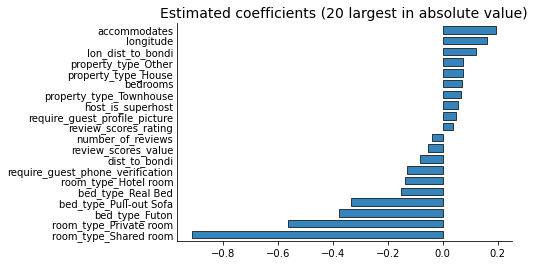

In [74]:
from statlearning import plot_coefficients
plot_coefficients(ols, log_x_train.columns)

In [75]:
ols.score(std_log_xtrain, log_y_train)

0.6937007353617994

### Part 5.1.2: Ridge Regression

In [76]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5)
ridge.fit(std_log_xtrain, log_y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [77]:
len(log_x_train.columns) - np.sum(ridge.coef_==0.0)

43

In [78]:
ridge_coeff = pd.DataFrame(np.c_[log_x_train.columns, ridge.coef_], columns=['features', 'coeff'])
ridge_coeff

,features,coeff
0,host_response_time,0.0301345
1,host_response_rate,-0.0276385
2,host_acceptance_rate,-0.00712758
3,host_is_superhost,0.0557304
4,host_listings_count,0.0122932
5,host_identity_verified,-0.000196553
6,latitude,-0.0223635
7,longitude,0.154734
8,accommodates,0.197749
9,bathrooms,0.0317726


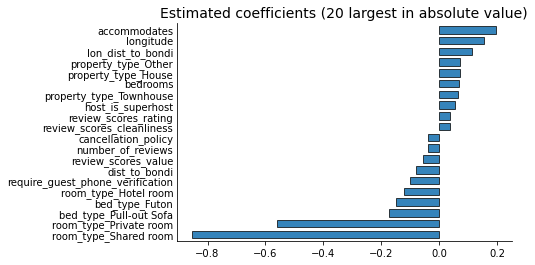

In [79]:
plot_coefficients(ridge, log_x_train.columns)
plt.show()

In [80]:
ridge.score(std_log_xtrain, log_y_train)

0.6935446427255789

### Part 5.1.3: Lasso Regression

In [81]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)
lasso.fit(std_log_xtrain, log_y_train)

LassoCV(cv=5)

In [82]:
len(log_x_train.columns) - np.sum(lasso.coef_==0.0)

33

In [83]:
lasso_coeff = pd.DataFrame(np.c_[log_x_train.columns, lasso.coef_], columns=['features', 'coeff'])
lasso_coeff

,features,coeff
0,host_response_time,0.00130075
1,host_response_rate,0
2,host_acceptance_rate,-0.00548208
3,host_is_superhost,0.0421906
4,host_listings_count,0.0127665
5,host_identity_verified,-0
6,latitude,-0.0187087
7,longitude,0.0875234
8,accommodates,0.198121
9,bathrooms,0.030491


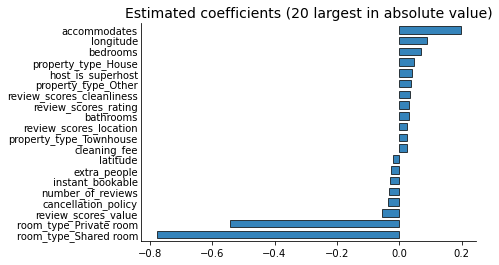

In [84]:
plot_coefficients(lasso, log_x_train.columns)
plt.show()

In [85]:
lasso.score(std_log_xtrain, log_y_train)

0.6912218655171563

### Part 5.1.4: Elastic Net

In [86]:
from sklearn.linear_model import ElasticNetCV

ratio = [x*0.1 for x in range(1, 10)]
ratio.append(0.01)
ratio.append(0.99)
enet = ElasticNetCV(l1_ratio=ratio, cv=5)
enet.fit(std_log_xtrain, log_y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                       0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 0.01,
                       0.99])

In [87]:
enet.l1_ratio_

0.99

In [88]:
len(log_x_train.columns) - np.sum(enet.coef_==0.0)

33

In [89]:
enet_coeff = pd.DataFrame(np.c_[log_x_train.columns, enet.coef_], columns=['features', 'coeff'])
enet_coeff

,features,coeff
0,host_response_time,0.00129527
1,host_response_rate,0
2,host_acceptance_rate,-0.00548241
3,host_is_superhost,0.0421897
4,host_listings_count,0.0127664
5,host_identity_verified,-0
6,latitude,-0.0187115
7,longitude,0.0875163
8,accommodates,0.19818
9,bathrooms,0.0304864


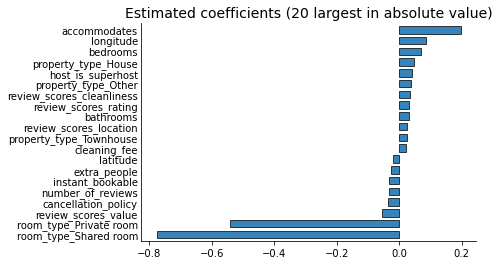

In [90]:
plot_coefficients(enet, log_x_train.columns)
plt.show()

In [91]:
enet.score(std_log_xtrain, log_y_train)

0.6912157077976877

### Part 5.1.5: RMSE

In [92]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

models = ['ols', 'ridge', 'lasso', 'enet']
rmse_scores = []
R2_scores = []
for m in models:
    predicted = cross_val_predict(eval(m), std_log_xtrain, log_y_train, cv=5)
    rmse_score = np.sqrt(mean_squared_error(np.exp(log_y_train), np.exp(predicted)))
    R2_score = r2_score(np.exp(log_y_train), np.exp(predicted))
    rmse_scores.append(rmse_score)
    R2_scores.append(R2_score)
socres_df = pd.DataFrame(np.c_[rmse_scores, R2_scores], index=models, columns=['RMSE', 'R2'])

In [93]:
socres_df

,RMSE,R2
ols,66.031447,0.605211
ridge,66.044819,0.605051
lasso,66.179053,0.603444
enet,66.179694,0.603436


## Part 5.2: Single Regression Tree

--------------------------------------------

In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

In [95]:
predictors = train_eda.drop(['Id', 'price'],axis=1).columns
predictors

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_identity_verified',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'property_type_House', 'property_type_Other',
       'property_type_Townhouse', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Futon',
       'bed_type_Pull-out Sofa', 'bed_type_Real Bed', 'lat_dist_to_bondi',
       'lon

In [96]:
x_train=train_eda.drop(['Id', 'price'],axis=1)
y_train=train_eda['price']
x_test=test_eda.drop(['Id'],axis=1)

In [97]:
train_eda['latitude']

0      -33.918732
1      -33.698425
2      -33.847388
3      -33.870261
4      -33.908168
          ...    
1995   -33.881002
1996   -33.868943
1997   -33.885611
1998   -33.867824
1999   -33.730697
Name: latitude, Length: 2000, dtype: float64

Next, we should find a tree of optimal size for prediction. Unfortunately, <TT>scikit-learn</TT> does not support cost-complexity pruning. As an alternative, we select the depth and minimum node size using the automated [<TT>GridSearchCV</TT>](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) funtion for this purpose.

In [98]:
dtr = DecisionTreeRegressor(criterion='mse')

tuning_parameters = {
    'min_samples_leaf':[1,4,5,10,20,50],
    'max_depth':np.arange(1,40)
}

tree_search = GridSearchCV(dtr, tuning_parameters, cv= 5 , return_train_score=False)
tree_search.fit(x_train, y_train)

tree = tree_search.best_estimator_

print('Best parameters found by grid search:', tree_search.best_params_, '\n')

Best parameters found by grid search: {'max_depth': 3, 'min_samples_leaf': 1} 



In [99]:
from sklearn.metrics import mean_squared_error
tree_pred = tree.predict(x_test)
tree_rmse = np.sqrt(mean_squared_error(y_train, tree_pred))

print('Regression tree RMSE: ', tree_rmse)

Regression tree RMSE:  132.37431089277302


In [100]:
tree_model = tree_search.best_estimator_
tree_model.fit(x_train, y_train)

from sklearn import tree

plt.figure(figsize=(200,100))
tree_graph = tree.plot_tree(tree_model, feature_names = predictors, rounded = True)
plt.savefig('Tree plot.jpg')

## Part 5.3: Advanced tree-based model
### Part 5.3.1: random forset

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
%%time

rf_model = RandomForestRegressor()


#n_estimators: number of trees

tuning_parameters = {
    'n_estimators':[250,500,750,1000,1500],
    'min_samples_leaf': [1,5, 10, 20, 50],
    'max_features': np.arange(1, log_x_train.shape[1]),
}


rf_search = RandomizedSearchCV(rf_model, tuning_parameters, cv = 5, n_iter= 16, \
                    return_train_score=False, n_jobs=-1, random_state = 20)
rf_search.fit(log_x_train, log_y_train)

rf = rf_search.best_estimator_

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')

Best parameters found by randomised search: {'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 18} 

CPU times: user 11.5 s, sys: 392 ms, total: 11.9 s
Wall time: 4min 51s


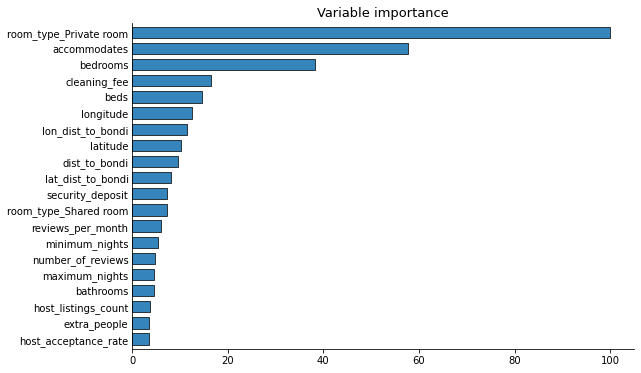

In [103]:
from statlearning import plot_feature_importance

plot_feature_importance(rf, log_x_train.columns)
plt.show()

### Part 5.3.2 Boosting

In [ ]:


gb_model = GradientBoostingRegressor()


tuning_parameters = {
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[250,500,750,1000,1500],
    'max_depth': [2,3,4],
    'subsample': [0.6, 0.8, 1.0],
}


gb_search = RandomizedSearchCV(gb_model, tuning_parameters, cv = 5, n_iter= 20, \
                    return_train_score=False, n_jobs=-1, random_state = 20)
gb_search.fit(log_x_train, log_y_train)

gb = gb_search.best_estimator_

print('Best parameters found by randomised search:', gb_search.best_params_, '\n')

In [ ]:
plot_feature_importance(gb, log_x_train.columns)
plt.show()

### Part 5.3.3 XGboost

In [ ]:
import xgboost as xgb

In [ ]:
xg_model = xgb.XGBRegressor(objective = 'reg:squarederror', reg_lambda = 0)

tuning_parameters = {
    'learning_rate':[0.01, 0.05, 0.1],
    'n_estimators':[1000, 1500, 2000],
    'max_depth':[2,3,4],
    'subsample':[0.6, 0.8, 1.0]
}

xbst = RandomizedSearchCV(xg_model, tuning_parameters, n_iter = 32, cv = 5, random_state = 87, n_jobs = -1)
xbst.fit(log_x_train, log_y_train)

xg = xbst.best_estimator_

print('Best parameters found by randomised search:', xbst.best_params_, '\n')

In [ ]:
plot_feature_importance(xg, log_x_train.columns)
plt.show()

## Part 5.4: Model Stack

In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.regressor import StackingCVRegressor
models = [ols,ridge,lasso]


stack = StackingCVRegressor(models, meta_regressor = LinearRegression(),cv = 10)
stack.fit(x_train.values, y_train.ravel())

In [ ]:
stack_pred = stack.predict(x_test)
np.sqrt(mean_squared_error(y_train,stack_pred))

In [ ]:
from statlearning import plot_coefficients
plot_coefficients(stack.meta_regr_,labels = ['ols','ridge', 'lasso']

# Part 6: Submission

----------------------------------------------

In [ ]:
final_pred = stack_pred
submission_stack = pd.DataFrame(np.c_[std_log_xtest.index, final_pred],
                         columns=['Id', 'price'])
submission_stack['Id']=submission_stack['Id'].astype(int)

submission_stack.to_csv('Kaggle_submission.csv', index = False)
submission_stack